In [1]:
import glob

import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset

from PIL import Image

In [12]:
img_size = 64
num_workers = 10
batch_size = 1
train_transforms = torchvision.transforms.Compose([
     T.Resize(img_size + int(.25*img_size)),  # args.img_size + 1/4 *args.img_size
     T.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
     T.ToTensor(),
     T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
 ])

In [13]:
# Custom Dataloader
## This dataloader processes images the same way that the torch dataloader does; however, one of them reads images in, in a different order
## To demonstrate the equivilance run with the trial image path

class CustomDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.imgs_path = "/Users/richardkyle/Documents/University/current/AIML589/Data/SubURMP64/images/clean/trial/" # Set image path e.g. trial for demonstration, train for application
        file_list = glob.glob(self.imgs_path + "*")
        #print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpg"):
                self.data.append([img_path, class_name])
        #print(self.data)
        #self.class_map = {"dogs" : 0, "cats": 1}
        self.img_dim = (64, 64)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = Image.open(img_path)
        img = img.convert("RGB")
        #img = np.array(img)
        #img = cv2.resize(img, self.img_dim)
        #class_id = self.class_map[class_name]
        #img_tensor = torch.from_numpy(img)
        #img_tensor = img_tensor.permute(2, 0, 1)
        #class_id = torch.tensor([class_id])
        img_path = img_path.split("/")[-1]

        if self.transform:
            img = self.transform(img)

        return img, img_path

In [14]:
# This code extracts all images and there associated labels. Use label information to read in embeddings into the main Diffusion model script
dataset = CustomDataset(transform=train_transforms)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

imgsList = []
labsList = []
for imgs, labs in data_loader:
    imgsList.append(imgs)
    labsList.append(labs)

In [15]:
# This code calls the default dataloader 
train_dataset = torchvision.datasets.ImageFolder('/Users/richardkyle/Documents/University/current/AIML589/Data/SubURMP64/images/clean/trial', transform=train_transforms)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
imgsListOriginal = []
labsListOriginal = []
for imgs, labs in train_dataloader:
    imgsListOriginal.append(imgs)
    labsListOriginal.append(labs)

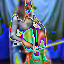

In [20]:
# Visualise image from custom dataloader
tran = T.ToPILImage()
imgsz = torch.squeeze(imgsList[0], 0)
imgsz = tran(imgsz)
imgsz

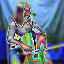

In [17]:
# Visualise image from default dataloader
tran = T.ToPILImage()
imgsz = torch.squeeze(imgsListOriginal[-1], 0)
imgsz = tran(imgsz)
imgsz

In [18]:
# See numeric representation of custom dataloader for image i
imgsList[-1]

tensor([[[[-0.6784, -0.6235, -0.6235,  ..., -0.4118, -0.7647, -0.8824],
          [-0.7020, -0.6235, -0.6235,  ..., -0.5843, -0.7569, -0.9137],
          [-0.7255, -0.6392, -0.6235,  ..., -0.6784, -0.7490, -0.9216],
          ...,
          [-0.9294, -0.9529, -0.9608,  ..., -0.9529, -0.9294, -0.9529],
          [-0.9294, -0.9451, -0.9529,  ..., -0.9529, -0.9294, -0.9529],
          [-0.9294, -0.9451, -0.9608,  ..., -0.9529, -0.9294, -0.9529]],

         [[-0.5686, -0.5059, -0.4980,  ..., -0.4275, -0.7176, -0.8039],
          [-0.5922, -0.5137, -0.5059,  ..., -0.6078, -0.7176, -0.8275],
          [-0.6157, -0.5216, -0.5059,  ..., -0.7176, -0.7255, -0.8431],
          ...,
          [-0.9137, -0.9059, -0.8902,  ..., -0.9451, -0.9294, -0.9529],
          [-0.9137, -0.9059, -0.8824,  ..., -0.9451, -0.9294, -0.9529],
          [-0.9216, -0.9137, -0.8980,  ..., -0.9451, -0.9373, -0.9608]],

         [[ 0.5843,  0.7176,  0.7961,  ..., -0.1137,  0.0353,  0.3569],
          [ 0.5608,  0.7098,  

In [19]:
# See numeric representation of default dataloader for image i
imgsListOriginal[0]

tensor([[[[-0.9059, -0.8902, -0.7569,  ..., -0.5373, -0.1765, -0.1765],
          [-0.9059, -0.8980, -0.7804,  ..., -0.7333, -0.6471, -0.5608],
          [-0.8980, -0.9137, -0.8118,  ..., -0.8275, -0.8431, -0.7255],
          ...,
          [-0.9608, -0.9294, -0.9216,  ..., -0.9529, -0.9686, -0.9608],
          [-0.9608, -0.9373, -0.9294,  ..., -0.9373, -0.9529, -0.9529],
          [-0.9608, -0.9373, -0.9294,  ..., -0.9373, -0.9529, -0.9529]],

         [[-0.8431, -0.7882, -0.6549,  ..., -0.6941, -0.3176, -0.2471],
          [-0.8431, -0.8118, -0.6784,  ..., -0.8510, -0.7647, -0.6314],
          [-0.8353, -0.8275, -0.7098,  ..., -0.9059, -0.9059, -0.7882],
          ...,
          [-0.9608, -0.9451, -0.9294,  ..., -0.9294, -0.9529, -0.9608],
          [-0.9529, -0.9529, -0.9373,  ..., -0.9216, -0.9451, -0.9608],
          [-0.9529, -0.9529, -0.9373,  ..., -0.9216, -0.9451, -0.9608]],

         [[ 0.2078,  0.2784,  0.4588,  ..., -0.4902, -0.3176, -0.1686],
          [ 0.2078,  0.2627,  